In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.EXTRASENSORY)

cfg.parallelize = True
cfg.in_memory = True
#force_recompute = False
force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-10 16:28:12,457 - whar-datasets - INFO - Running DownloadingStep
2026-02-10 16:28:12,462 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-10 16:28:12,468 - whar-datasets - INFO - Hash is up to date
2026-02-10 16:28:12,472 - whar-datasets - INFO - Forcing recompute
2026-02-10 16:28:12,475 - whar-datasets - INFO - Running ParsingStep
2026-02-10 16:28:12,478 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-10 16:28:12,494 - whar-datasets - INFO - Hash is up to date
2026-02-10 16:28:12,496 - whar-datasets - INFO - Checking download
2026-02-10 16:28:12,501 - whar-datasets - INFO - Download exists
2026-02-10 16:28:12,505 - whar-datasets - INFO - Parsing to common format


Verarbeite Subject: A5A30F76-581E-4757-97A2-957553A2C6AA


Creating sessions: 100%|██████████| 635/635 [00:03<00:00, 176.44it/s]


Verarbeite Subject: BEF6C611-50DA-4971-A040-87FB979F3FC1


Creating sessions: 100%|██████████| 103/103 [00:00<00:00, 220.36it/s]
2026-02-10 16:30:30,144 - whar-datasets - INFO - Saving common format
2026-02-10 16:30:31,229 - whar-datasets - INFO - Forcing recompute
2026-02-10 16:30:31,235 - whar-datasets - INFO - Running WindowingStep
2026-02-10 16:30:31,240 - whar-datasets - INFO - Checking hash for WindowingStep
2026-02-10 16:30:31,248 - whar-datasets - INFO - Hash is not up to date
2026-02-10 16:30:31,545 - whar-datasets - INFO - Validating common format
2026-02-10 16:30:31,787 - whar-datasets - INFO - Validating sessions (parallelized)


[########################################] | 100% Completed | 19.61 s


2026-02-10 16:30:52,398 - whar-datasets - INFO - Common format validated.
2026-02-10 16:30:52,398 - whar-datasets - INFO - Compute windowing
2026-02-10 16:30:52,398 - whar-datasets - INFO - Selecting activities
2026-02-10 16:30:52,474 - whar-datasets - INFO - Processing sessions (parallelized)


[########################################] | 100% Completed | 36.98 s


2026-02-10 16:31:30,679 - whar-datasets - INFO - Saving windowing
2026-02-10 16:31:36,492 - whar-datasets - INFO - Loading windowing
2026-02-10 16:31:36,874 - whar-datasets - INFO - activity_ids from 0 to 50
2026-02-10 16:31:36,882 - whar-datasets - INFO - subject_ids from 0 to 1


In [4]:
# splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

fold_0 1827 456 254
fold_1 1827 456 254
fold_2 1827 456 254
fold_3 1827 456 254
fold_4 1827 456 254
fold_5 1827 456 254
fold_6 1827 456 254
fold_7 1828 456 253
fold_8 1828 456 253
fold_9 1828 456 253


In [5]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-02-10 16:31:44,695 - whar-datasets - INFO - Forcing recompute
2026-02-10 16:31:44,699 - whar-datasets - INFO - Running SamplingStep
2026-02-10 16:31:44,704 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-10 16:31:44,716 - whar-datasets - INFO - Hash is not up to date
2026-02-10 16:31:48,314 - whar-datasets - INFO - Computing samples
2026-02-10 16:31:48,314 - whar-datasets - INFO - Getting normalization parameters
2026-02-10 16:31:48,584 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 22.84 s


2026-02-10 16:32:12,764 - whar-datasets - INFO - Saving samples
2026-02-10 16:32:12,977 - whar-datasets - INFO - Loading samples


In [6]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)

C:\Users\hohma\Teco\whar-datasets\src\whar_datasets\loading\loader.py:164: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


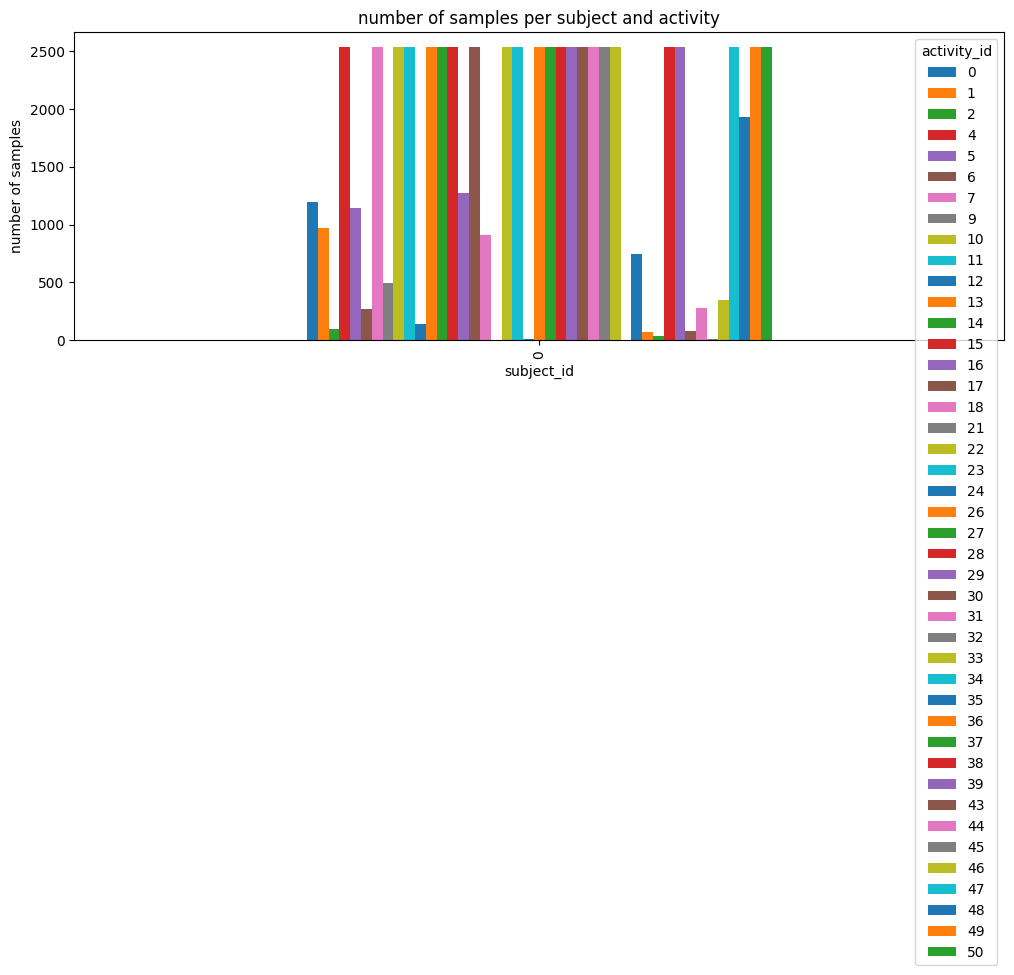

In [7]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: [0, 4, 5, 7, 10, 11, 13, 14, 15, 16, 17, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 38, 39, 47, 48, 49, 50], Subject: 0')

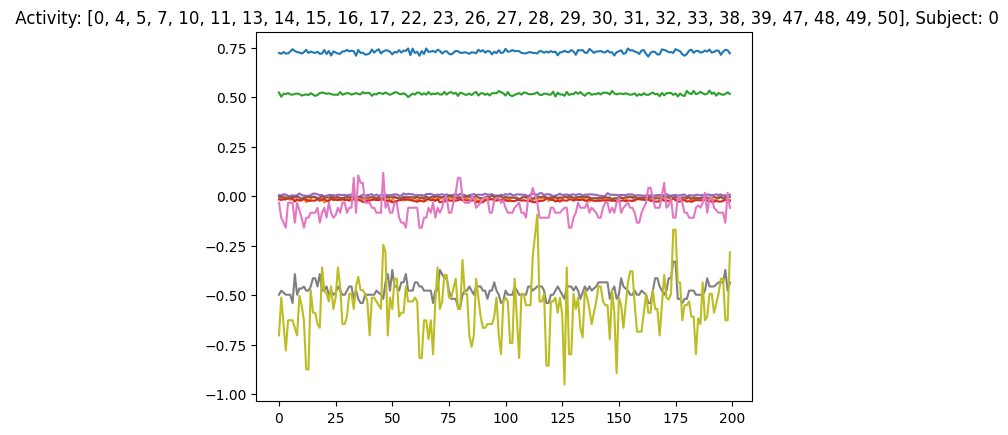

In [15]:
subject_id = 0
activity_id = 7

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")